In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import train


In [35]:
dfList = train.transform()
#df.shape

In [34]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#df.head(5)

[0.93278689 0.93114754 0.93278689 0.93267652 0.93431856]
93.2743277073407 %


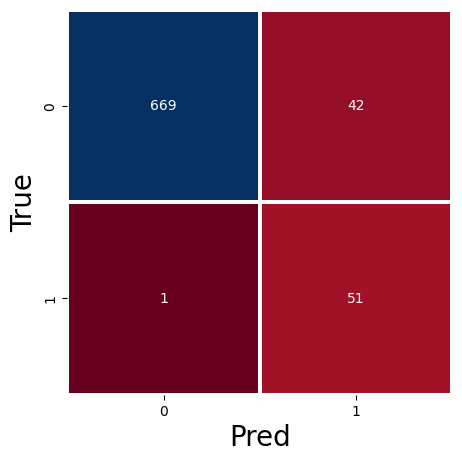

precision = 0.5483870967741935
[0.93606557 0.93606557 0.93442623 0.93596059 0.93596059]
93.5695711863038 %


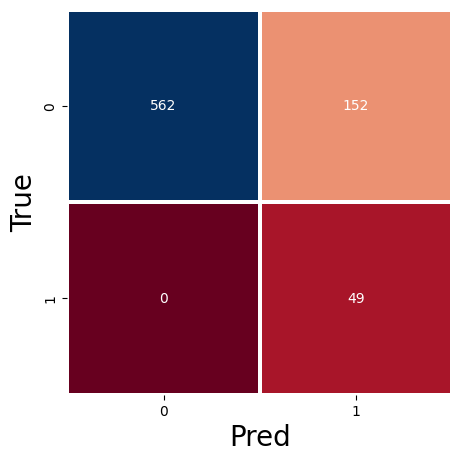

precision = 0.24378109452736318
[0.93934426 0.93770492 0.93770492 0.93924466 0.93924466]
93.8648685025169 %


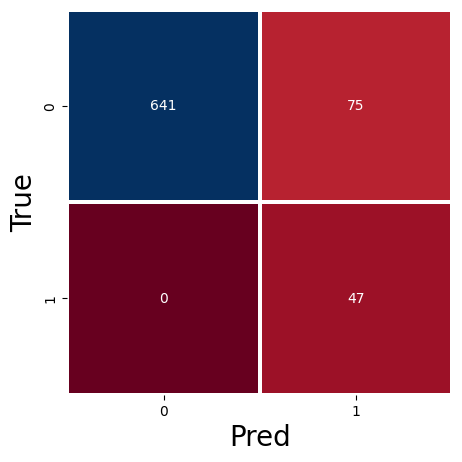

precision = 0.38524590163934425
[0.97868852 0.9704918  0.97377049 0.97372742 0.97536946]
97.4409539960699 %


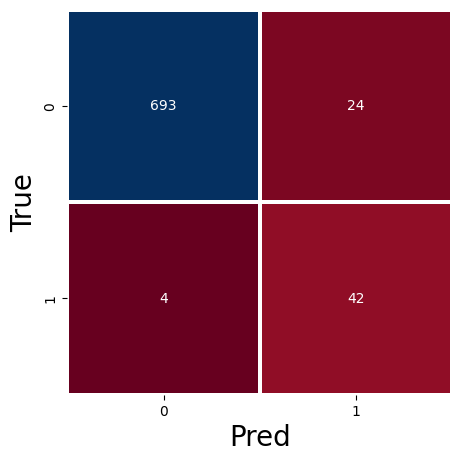

precision = 0.6363636363636364
[0.94098361 0.94098361 0.94098361 0.94252874 0.94252874]
94.16016581873 %


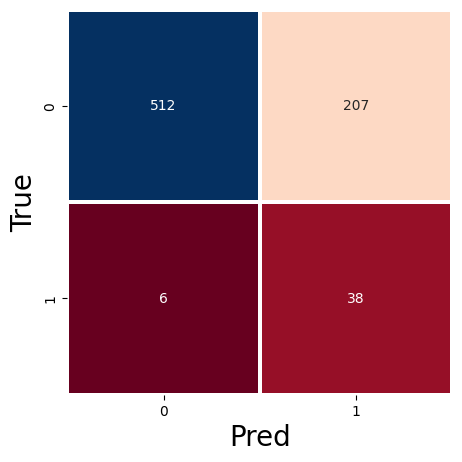

precision = 0.15510204081632653
[0.96885246 0.95901639 0.95901639 0.96880131 0.96880131]
96.48975746318878 %


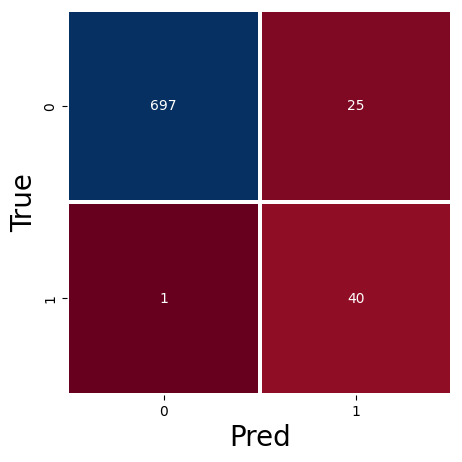

precision = 0.6153846153846154
[0.94098361 0.94098361 0.94098361 0.94252874 0.9408867 ]
94.12732509623409 %


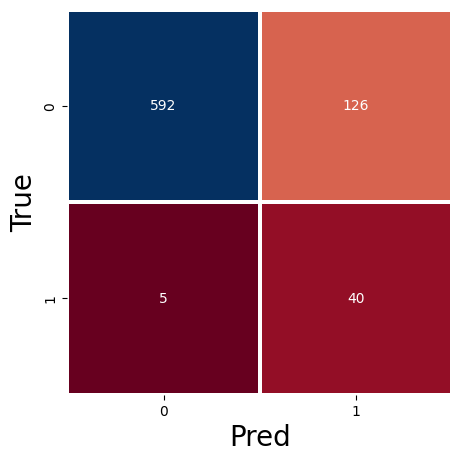

precision = 0.24096385542168675
[0.94590164 0.94918033 0.94590164 0.95238095 0.94745484]
94.81638805889796 %


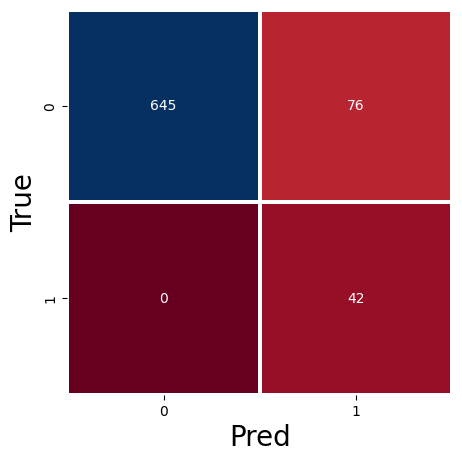

precision = 0.3559322033898305
[0.95081967 0.95081967 0.95081967 0.95073892 0.95073892]
95.07873697811516 %


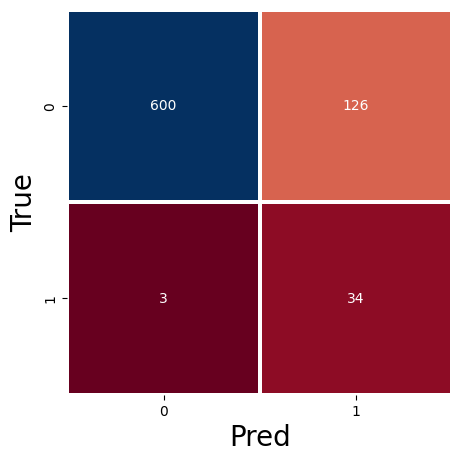

precision = 0.2125
[0.9442623  0.9442623  0.9442623  0.94581281 0.94417077]
94.45540929769308 %


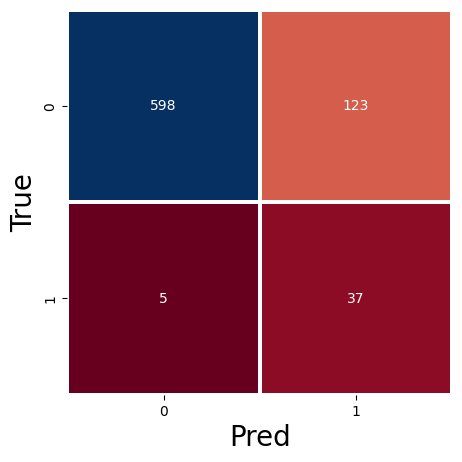

precision = 0.23125
[0.94590164 0.94590164 0.94262295 0.94581281 0.94581281]
94.52103690543487 %


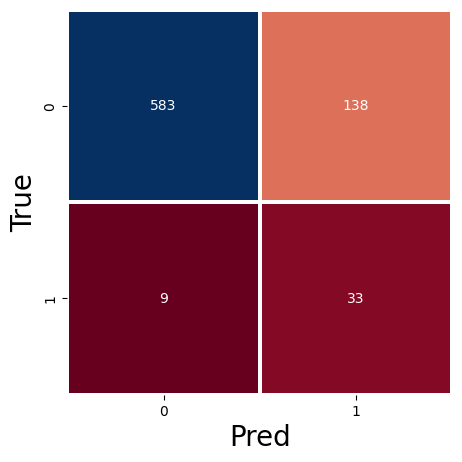

precision = 0.19298245614035087
[0.94918033 0.94754098 0.94754098 0.94909688 0.94909688]
94.84912110689386 %


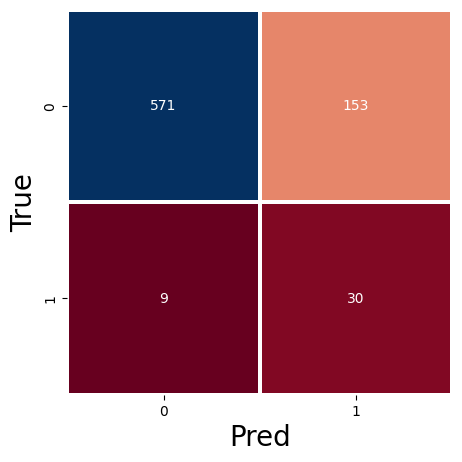

precision = 0.16393442622950818
[1. 1. 1. 1. 1.]
100.0 %


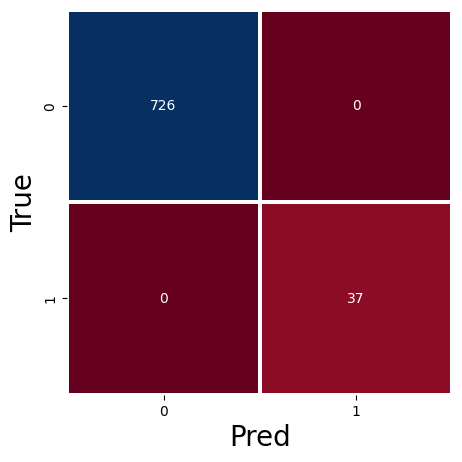

precision = 1.0
[0.9557377  0.9557377  0.9557377  0.95730706 0.95566502]
95.60370400279953 %


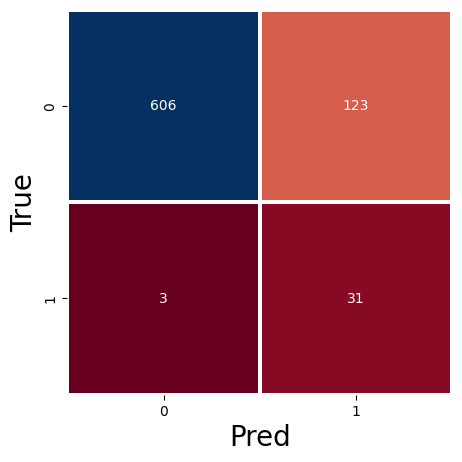

precision = 0.2012987012987013
[0.95409836 0.95409836 0.95245902 0.95402299 0.95402299]
95.37403429432825 %


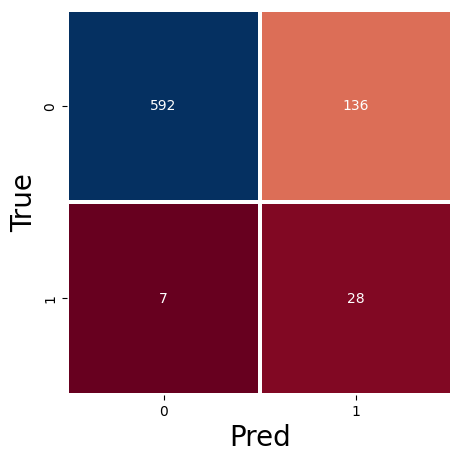

precision = 0.17073170731707318
[0.96393443 0.96229508 0.96229508 0.96387521 0.96387521]
96.32550001345932 %


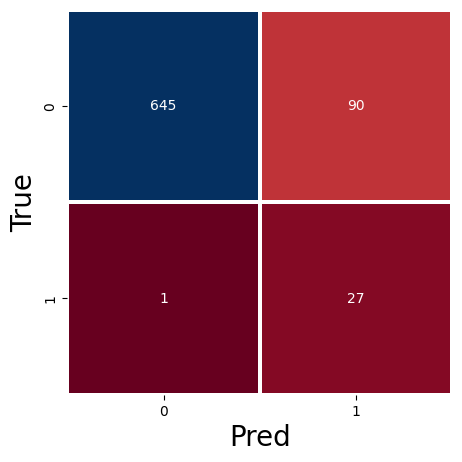

precision = 0.23076923076923078
[0.9557377  0.9557377  0.9557377  0.95402299 0.95730706]
95.57086328030364 %


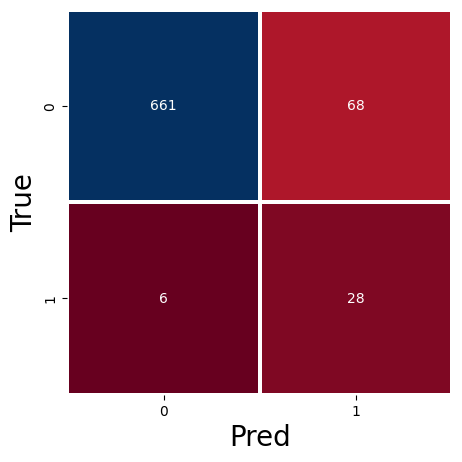

precision = 0.2916666666666667
[0.95081967 0.95081967 0.95081967 0.95238095 0.95073892]
95.11157770061105 %


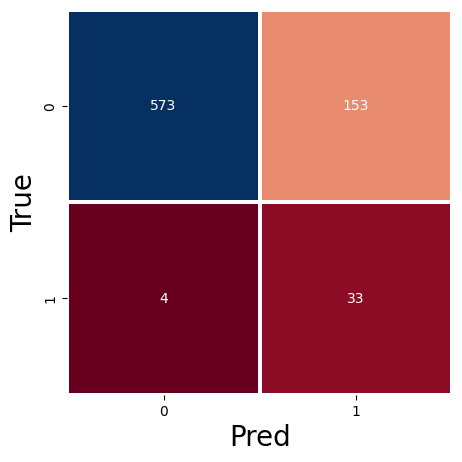

precision = 0.1774193548387097
[0.96229508 0.96229508 0.96557377 0.96223317 0.95730706]
96.19408328622573 %


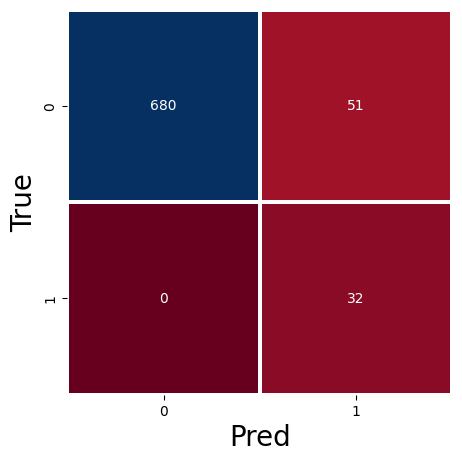

precision = 0.3855421686746988


In [32]:
import pickle
i=0
precisionList = []
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set

    #print(pd.Series(y_train).value_counts())
    #print(pd.Series(y_test).value_counts())

    X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    #print(pd.Series(y_re).value_counts())
    
    model = svm.SVC(kernel='rbf', C=10)

    model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
    y_pred = model.predict(X_test)

    #print(f"model{i} train score: " + str(model.score(X_re, y_re)))
    #print(f"model{i} test score: " + str(model.score(X_test, y_test.astype('int'))))
    
    #pickle.dump(model,open(f'./models/model{i}.pkl','wb'))
    acc = cross_val_score(model, X_train, y_train.astype('int'), cv=5, scoring='accuracy')
    print(acc)
    print(acc.mean()*100, '%')
    i+=1
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    precision = tp/(tp+fp)
    precisionList.append(precision)
    print("precision = "+str(precision))
    


In [33]:
avgPrecision = 0
for i in precisionList:
    avgPrecision += i
avgPrecision = avgPrecision / len(precisionList)
print(avgPrecision)

0.33890816611852304


In [6]:
'''X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y) #stratify=y?
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
print(pd.Series(y_re).value_counts())'''

"X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y) #stratify=y?\nprint(pd.Series(y_train).value_counts())\nprint(pd.Series(y_test).value_counts())\n\nX_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset\nprint(pd.Series(y_re).value_counts())"

In [7]:
model = svm.SVC(kernel='rbf', C=10)

model.fit(X_re,y_re)
y_pred = model.predict(X_test)

print(model.score(X_re, y_re))
print(model.score(X_test, y_test.astype('int')))

0.966974674880219
0.9331585845347313


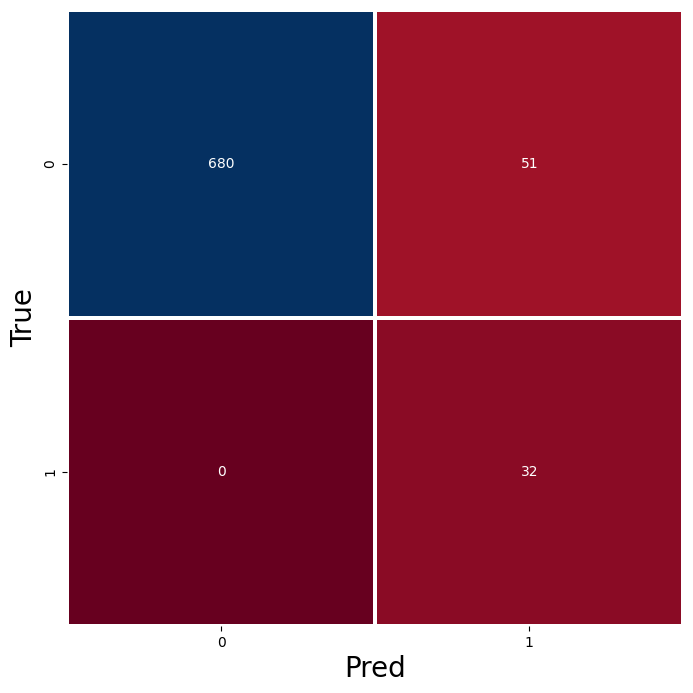

acc = 0.9331585845347313
precision = 0.3855421686746988


In [8]:
cm = confusion_matrix(y_test.astype('int'), y_pred)
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()
tn, fp, fn, tp = cm.ravel()
print("acc = " + str((tp+tn)/(tp+tn+fp+fn)))
print("precision = "+str(tp/(tp+fp)))

In [9]:
print(classification_report(y_test.astype('int'),y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       731
           1       0.39      1.00      0.56        32

    accuracy                           0.93       763
   macro avg       0.69      0.97      0.76       763
weighted avg       0.97      0.93      0.95       763



In [10]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))